### Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

Создайте датафреймы X и y из этих данных

In [4]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(boston["target"], columns=["price"])

y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы 
на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
feature_names = boston["feature_names"]

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)

In [11]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))


До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных

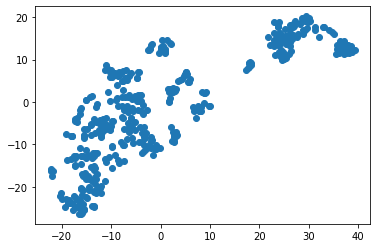

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [14]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)
model.fit(X_train)

KMeans(max_iter=100, n_clusters=3, random_state=42)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)

In [17]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [18]:
train_labels_TSNE = model.fit_predict(X_train_tsne)

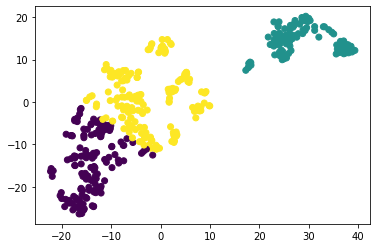

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],  c=train_labels_TSNE)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [20]:
y_train[train_labels_TSNE == 0].mean()

price    26.564706
dtype: float64

In [21]:
y_train[train_labels_TSNE == 1].mean()

price    16.277228
dtype: float64

In [22]:
y_train[train_labels_TSNE == 2].mean()

price    23.670659
dtype: float64

Посмотрим данные на графике:

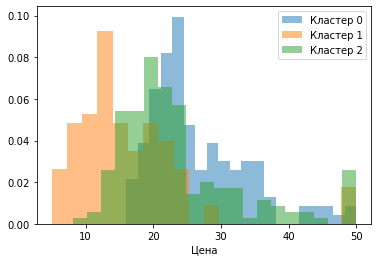

In [23]:

plt.hist(y_train[train_labels_TSNE == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[train_labels_TSNE == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[train_labels_TSNE == 2], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2' ])
plt.xlabel('Цена')
plt.show()

Посчитаем среднее CRIM в кластере с меткой "0" и посмотрим данные на графике:

In [24]:
X_train['CRIM'][train_labels_TSNE == 0].mean()

0.09462279411764711

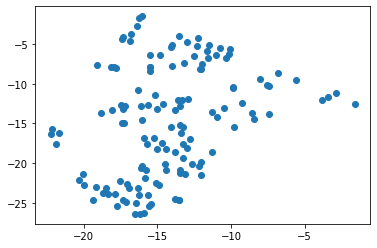

In [25]:
a = plt.scatter(X_train_tsne[train_labels_TSNE==0, [0]], X_train_tsne[train_labels_TSNE==0, [1]])
plt.show()

На диаграме TSNE это был фиолетовый сектор, выберем для гистограммы пурпурный. (Так же выберем близкие цвета для других кластеров.) 

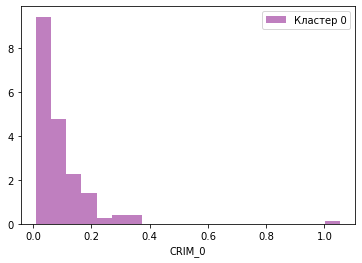

In [26]:
plt.hist(X_train['CRIM'][train_labels_TSNE == 0], bins=20, density=True, alpha=0.5, color='purple')
plt.legend(['Кластер 0'])
plt.xlabel('CRIM_0')
plt.show()

Посчитаем среднее CRIM в кластере с меткой "1" и посмотрим данные на графике:

In [29]:
X_train['CRIM'][train_labels_TSNE == 1].mean()

13.17982178217822

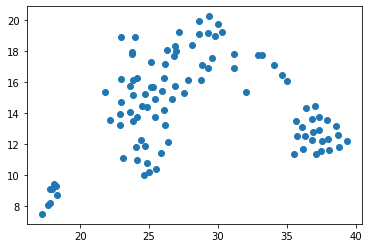

In [30]:
a = plt.scatter(X_train_tsne[train_labels_TSNE==1, [0]], X_train_tsne[train_labels_TSNE==1, [1]])
plt.show()

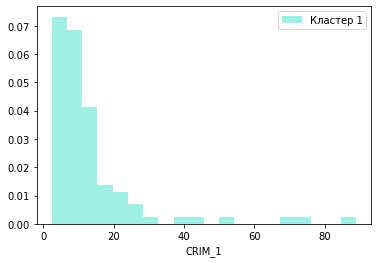

In [31]:
plt.hist(X_train['CRIM'][train_labels_TSNE == 1], bins=20, density=True, alpha=0.5, color='turquoise')
plt.legend(['Кластер 1'])
plt.xlabel('CRIM_1')
plt.show()

Посчитаем среднее CRIM в кластере с меткой "2" и посмотрим данные на графике:

In [32]:
X_train['CRIM'][train_labels_TSNE == 2].mean()

0.6829679640718564

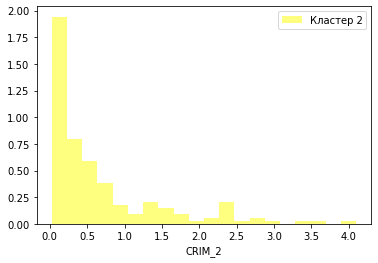

In [33]:
plt.hist(X_train['CRIM'][train_labels_TSNE == 2], bins=20, density=True, alpha=0.5, color='yellow')
plt.legend(['Кластер 2'])
plt.xlabel('CRIM_2')
plt.show()

### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [34]:
model.fit(X_test)

KMeans(max_iter=100, n_clusters=3, random_state=42)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

Проэкспериментируем и сделаем это для данных без применения метода TSNE:

In [35]:
test_labels_noTSNE = model.fit_predict(X_test)

In [36]:
y_test[test_labels_noTSNE == 0].mean()

price    23.911594
dtype: float64

In [37]:
train_labels_noTSNE = model.fit_predict(X_train)

In [38]:
y_train[train_labels_noTSNE == 0].mean()

price    25.168687
dtype: float64

Средние значения довольно сильно расходятся: 25.168687 - на тренировочной выборке и 23.911594 - на тестовой

Применим к тестовой выборке метод TSNE:

In [39]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [40]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [41]:
test_labels_TSNE = model.fit_predict(X_test_tsne)

In [42]:
y_test[test_labels_TSNE == 0].mean()

price    26.980556
dtype: float64

Теперь значения ближе: обучение дает 26.564706, тест дает 26.980556

Оценим среднее значение цен остальных кластерах.
В кластере "1" на тренировочных данных значение было 16.277228

In [43]:
y_test[test_labels_TSNE == 1].mean()

price    16.525
dtype: float64

В кластере "2" на тренировочных данных значение было 23.670659

In [44]:
y_test[test_labels_TSNE == 2].mean()

price    20.853333
dtype: float64

Соберем данные в таблицу для разных вариантов: с обработской по методу TSNE и без TSNE

In [45]:
train_labels_noTSNE = model.fit_predict(X_train)

In [46]:
clasters = []
price_mean_noTSNE_train = []
price_mean_noTSNE_test = []
price_mean_TSNE_train = []
price_mean_TSNE_test = []

for i in range(3):
    clasters.append(i)
    price_mean_noTSNE_train.append(y_train[train_labels_noTSNE == i].mean()['price'])
    price_mean_noTSNE_test.append(y_test[test_labels_noTSNE == i].mean()['price'])
    price_mean_TSNE_train.append(y_train[train_labels_TSNE == i].mean()['price'])
    price_mean_TSNE_test.append(y_test[test_labels_TSNE == i].mean()['price'])
    
table_mean_price = pd.DataFrame({"clasters": clasters, 
                           "price_mean_noTSNE_train": price_mean_noTSNE_train,
                           "price_mean_noTSNE_test": price_mean_noTSNE_test,
                           "price_mean_TSNE_train": price_mean_TSNE_train,
                           "price_mean_TSNE_test": price_mean_TSNE_test         
                          })
table_mean_price

,clasters,price_mean_noTSNE_train,price_mean_noTSNE_test,price_mean_TSNE_train,price_mean_TSNE_test
0,0,25.168687,23.911594,26.564706,26.980556
1,1,17.442105,17.392308,16.277228,16.525000
2,2,13.196774,12.814286,23.670659,20.853333


In [47]:
clasters = []
CRIM_mean_noTSNE_train = []
CRIM_mean_noTSNE_test = []
CRIM_mean_TSNE_train = []
CRIM_mean_TSNE_test = []

for i in range(3):
    clasters.append(i)
    CRIM_mean_noTSNE_train.append(X_train['CRIM'][train_labels_noTSNE == i].mean())
    CRIM_mean_noTSNE_test.append(X_test['CRIM'][test_labels_noTSNE == i].mean())
    CRIM_mean_TSNE_train.append(X_train['CRIM'][train_labels_TSNE == i].mean())
    CRIM_mean_TSNE_test.append(X_test['CRIM'][test_labels_TSNE == i].mean())
    
table_mean_CRIM = pd.DataFrame({"clasters": clasters, 
                           "CRIM_mean_noTSNE_train": CRIM_mean_noTSNE_train,
                           "CRIM_mean_noTSNE_test": CRIM_mean_noTSNE_test,
                           "CRIM_mean_TSNE_train": CRIM_mean_TSNE_train,
                           "CRIM_mean_TSNE_test": CRIM_mean_TSNE_test                          
                          })
table_mean_CRIM

,clasters,CRIM_mean_noTSNE_train,CRIM_mean_noTSNE_test,CRIM_mean_TSNE_train,CRIM_mean_TSNE_test
0,0,0.404863,0.246421,0.094623,0.110549
1,1,11.745662,8.469302,13.179822,9.916293
2,2,14.360380,19.021666,0.682968,0.313010


Посмотрим на график цен без использования метода TSNE. 

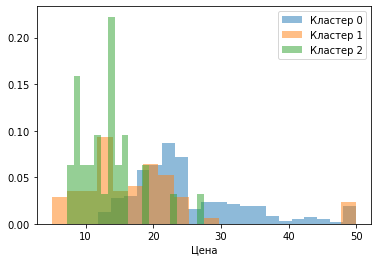

In [51]:
plt.hist(y_train[train_labels_noTSNE == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[train_labels_noTSNE == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[train_labels_noTSNE == 2], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2' ])
plt.xlabel('Цена')
plt.show()

С методом TSNE результаты выглядят получше. Но данные во 2-м кластере "гуляют".